In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotx
from labellines import labelLines


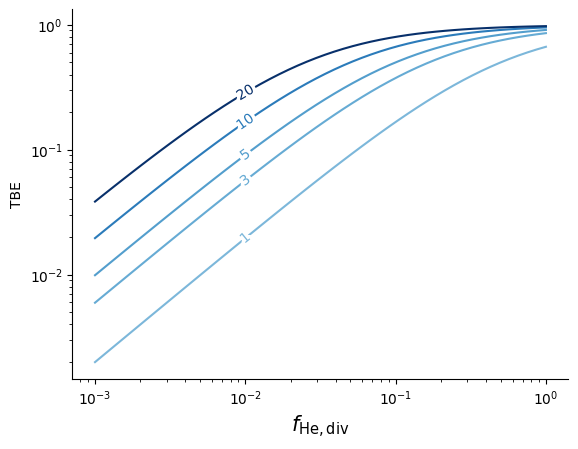

In [2]:
def compute_TBE(f_he_div, sigma):
    return (1 / (2 * f_he_div * sigma) + 1) ** -1


norm = colors.Normalize(vmin=-15, vmax=20)

f_he_div = np.logspace(-3, 0)
for sigma in [1, 3, 5, 10, 20]:
    plt.loglog(
        f_he_div, compute_TBE(f_he_div, sigma), label=sigma, color=cm.Blues(norm(sigma))
    )

labelLines(plt.gca().get_lines(), zorder=2.5, xvals=[1e-2, 1e-2, 1e-2, 1e-2, 1e-2])

plt.xlabel("$f_\mathrm{He,div}$", fontsize=15)
plt.ylabel("TBE")
plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)
plt.savefig("TBE_fHediv.pdf")


In [3]:
def P_f_normalized(f_he_div, eta_he):
    return 1 - 1 / (1 + eta_he / (2 * f_he_div))


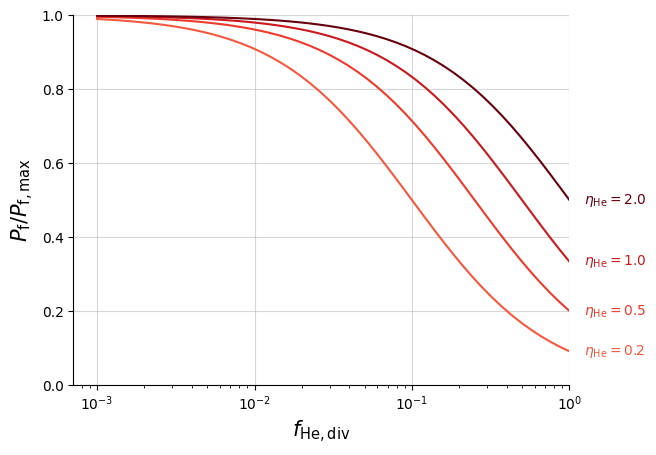

In [4]:
f_he_div = np.logspace(-3, 0)

norm = colors.Normalize(vmin=-2, vmax=2)

for eta_he in [0.2, 0.5, 1, 2]:
    pf = P_f_normalized(f_he_div, eta_he)

    plt.plot(
        f_he_div,
        pf,
        label="$\eta_\mathrm{He} = $" + f"{eta_he:.1f}",
        color=cm.Reds(norm(eta_he)),
    )

plt.xscale("log")
plt.xlabel("$f_\mathrm{He,div}$", fontsize=15)
plt.ylabel("$P_\mathrm{f}/P_\mathrm{f, max}$", fontsize=15)
plt.grid(alpha=0.5)
plt.ylim(0, 1)
plt.xlim(right=1)

matplotx.line_labels()
plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)


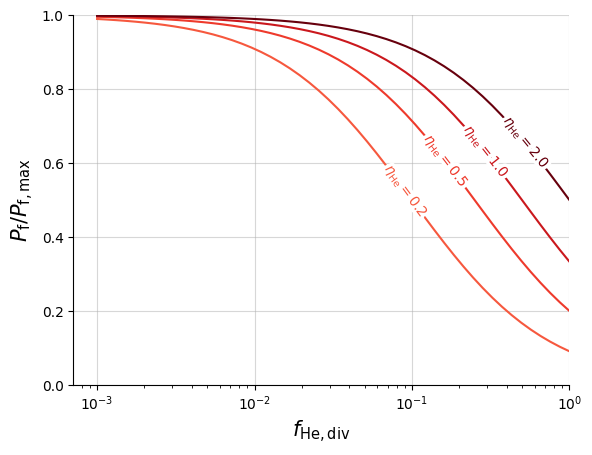

In [5]:
f_he_div = np.logspace(-3, 0)

norm = colors.Normalize(vmin=-2, vmax=2)

for eta_he in [0.2, 0.5, 1, 2]:
    pf = P_f_normalized(f_he_div, eta_he)

    plt.plot(
        f_he_div,
        pf,
        label="$\eta_\mathrm{He} = $" + f"{eta_he:.1f}",
        color=cm.Reds(norm(eta_he)),
    )

plt.xscale("log")
plt.xlabel("$f_\mathrm{He,div}$", fontsize=15)
plt.ylabel("$P_\mathrm{f}/P_\mathrm{f, max}$", fontsize=15)
plt.grid(alpha=0.5)
plt.ylim(0, 1)
plt.xlim(right=1)

labelLines(plt.gca().get_lines(), zorder=2.5)
plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)
plt.savefig("Pf_fhe.pdf")


Here's an example on how to use sympy to derive equations

In [6]:
import sympy as sp


Deriving TBE

In [7]:
n_dot_t_burn = sp.Symbol("\dot{N}_\mathrm{T, burn}")
n_dot_alpha = sp.Symbol(r"\dot{N}_\alpha")
n_dot_he_div = sp.Symbol(r"\dot{N}_\mathrm{He, div}")

n_dot_t_in = sp.Symbol(r"\dot{N}_\mathrm{T, in}")
n_dot_t_div = sp.Symbol(r"\dot{N}_\mathrm{T, div}")
n_dot_d_in = sp.Symbol(r"\dot{N}_\mathrm{D, in}")
n_dot_d_div = sp.Symbol(r"\dot{N}_\mathrm{D, div}")
n_dot_q_in = sp.Symbol(r"\dot{N}_\mathrm{Q, in}")
n_dot_q_div = sp.Symbol(r"\dot{N}_\mathrm{Q, div}")
n_dot_he_in = sp.Symbol(r"\dot{N}_\mathrm{He, in}")
tbe = sp.Symbol(r"\mathrm{TBE}")

# Eq 2

n_T_burn_eqs_n_alpha = sp.Eq(n_dot_t_burn, n_dot_alpha)
n_T_burn_eqs_n_he_div = sp.Eq(n_dot_t_burn, n_dot_he_div)

# Eq 3

n_t_in_eqs_n_d_in = sp.Eq(n_dot_t_in, n_dot_d_in)
n_t_in_eqs_half_n_q_in = sp.Eq(n_dot_t_in, sp.Rational("0.5") * n_dot_q_in)

# Eq 4
n_t_div_eqs_n_d_div = sp.Eq(n_dot_t_div, n_dot_d_div)
n_t_div_eqs_half_n_q_div = sp.Eq(n_dot_t_div, sp.Rational("0.5") * n_dot_q_div)

# Eq 5
inventory_equilibrium = sp.Eq(n_dot_q_in, n_dot_q_div + sp.Rational("2") * n_dot_he_div)

# Eq6

tbe_definition = sp.Eq(tbe, n_dot_t_burn / n_dot_t_in)
tbe_definition


Eq(\mathrm{TBE}, \dot{N}_\mathrm{T, burn}/\dot{N}_\mathrm{T, in})

In [8]:
# Equation 6
eq6 = (
    tbe_definition.subs(n_dot_t_burn, sp.solve(n_T_burn_eqs_n_alpha, n_dot_t_burn)[0])
    .subs(n_dot_t_in, sp.solve(n_t_in_eqs_half_n_q_in, n_dot_t_in)[0])
    .subs(n_dot_q_in, sp.solve(inventory_equilibrium, n_dot_q_in)[0])
    .subs(n_dot_q_div, sp.solve(n_t_div_eqs_half_n_q_div, n_dot_q_div)[0])
).simplify()

eq6


Eq(\mathrm{TBE}, \dot{N}_\alpha/(\dot{N}_\mathrm{He, div} + \dot{N}_\mathrm{T, div}))

In [9]:
# Eq 7
eq7a = eq6.subs(n_dot_alpha, sp.solve(n_T_burn_eqs_n_alpha, n_dot_alpha)[0]).subs(
    n_dot_t_burn, sp.solve(n_T_burn_eqs_n_he_div, n_dot_t_burn)[0]
)

# TODO make this programmatically
# see https://stackoverflow.com/questions/74732938/how-to-factorize-fraction-by-a-given-symbol
eq7b = eq7a.subs(n_dot_he_div, 1).subs(n_dot_t_div, n_dot_t_div / n_dot_he_div)

eq7 = sp.Eq(eq7a.lhs, sp.Eq(eq7a.rhs, eq7b.rhs))
eq7


Eq(\mathrm{TBE}, Eq(\dot{N}_\mathrm{He, div}/(\dot{N}_\mathrm{He, div} + \dot{N}_\mathrm{T, div}), 1/(1 + \dot{N}_\mathrm{T, div}/\dot{N}_\mathrm{He, div})))

In [10]:
# Eq 8

eq8 = eq7b.subs(n_dot_t_div, sp.solve(n_t_div_eqs_half_n_q_div, n_dot_t_div)[0])
eq8


Eq(\mathrm{TBE}, 1/(1 + \dot{N}_\mathrm{Q, div}/(2*\dot{N}_\mathrm{He, div})))

In [11]:
n_d_div = sp.Symbol("n_\mathrm{D, div}")
n_t_div = sp.Symbol("n_\mathrm{T, div}")
n_he_div = sp.Symbol("n_\mathrm{He, div}")
n_q_div = sp.Symbol("n_\mathrm{Q, div}")

S_d = sp.Symbol("S_\mathrm{D}")
S_t = sp.Symbol("S_\mathrm{T}")
S_he = sp.Symbol("S_\mathrm{He}")
S_q = sp.Symbol("S_\mathrm{Q}")

sigma = sp.Symbol("\Sigma")
f_he_div = sp.Symbol("f_\mathrm{He, div}")


In [12]:
eq9_q_div = sp.Eq(n_dot_q_div, n_q_div * S_q)
eq9_he_div = sp.Eq(n_dot_he_div, n_he_div * S_he)


In [13]:
eq10 = sp.Eq(sigma, S_he / S_q)
eq10


Eq(\Sigma, S_\mathrm{He}/S_\mathrm{Q})

In [14]:
eq11 = sp.Eq(f_he_div, n_he_div / n_q_div)
eq11


Eq(f_\mathrm{He, div}, n_\mathrm{He, div}/n_\mathrm{Q, div})

In [15]:
eq12 = eq8.subs(n_dot_q_div, sp.solve(eq9_q_div, n_dot_q_div)[0]).subs(
    n_dot_he_div, sp.solve(eq9_he_div, n_dot_he_div)[0]
)
eq12 = eq12.subs(S_q, sp.solve(eq10, S_q)[0])
eq12 = eq12.subs(n_q_div, sp.solve(eq11, n_q_div)[0])
eq12


Eq(\mathrm{TBE}, 1/(1 + 1/(2*\Sigma*f_\mathrm{He, div})))

In [16]:
P_f = sp.Symbol("P_f")
P_f_max = sp.Symbol("P_{f, max}")
f_dil = sp.Symbol("f_{dil}")
f_alpha_core = sp.Symbol(r"f_{\alpha, core}")
eta_he = sp.Symbol("\eta_{He}")
n_alpha = sp.Symbol(r"n_{\alpha}")
n_q_core = sp.Symbol(r"n_{Q, core}")
n_e = sp.Symbol(r"n_{e}")

# enrichment : eta_he = f_he_div/f_alpha_core
enrichment = sp.Eq(eta_he, f_he_div / f_alpha_core)

# f_alpha_core expression
f_alpha_core_expr = sp.Eq(f_alpha_core, n_alpha / n_q_core)

# charge neutrality
charge_neutrality = sp.Eq(n_e, n_q_core + 2 * n_alpha)

# ash dilution fraction
ash_dilution_fraction = sp.Eq(f_dil, n_alpha / n_e)

# substitute ash dil. and charge neutrality to get new expr for f_alpha_core
f_alpha_core_expr = f_alpha_core_expr.subs(
    n_q_core, sp.solve(charge_neutrality, n_q_core)[0]
).subs(n_e, sp.solve(ash_dilution_fraction, n_e)[0])

# Pf/Pfmax = (1 - 2 f_dil)**2
power_ratio = sp.Eq(P_f / P_f_max, (1 - 2 * f_dil) ** 2)

# Substitute f_dil and f_alpha_core in power ratio
new_power_ratio = power_ratio.subs(f_dil, sp.solve(f_alpha_core_expr, f_dil)[0]).subs(
    f_alpha_core, sp.solve(enrichment, f_alpha_core)[0]
)
new_power_ratio
# new_power_ratio.simplify()


Eq(P_f/P_{f, max}, (1 - 2*f_\mathrm{He, div}/(\eta_{He}*(1 + 2*f_\mathrm{He, div}/\eta_{He})))**2)

In [17]:
# formula for figure 3

power_ratio_vs_sigma_eta_he = new_power_ratio.subs(
    f_he_div, sp.solve(eq12, f_he_div)[0]
)
power_ratio_vs_sigma_eta_he.simplify()


Eq(P_f/P_{f, max}, \Sigma**2*\eta_{He}**2*(\mathrm{TBE} - 1)**2/(\Sigma*\eta_{He}*(\mathrm{TBE} - 1) - \mathrm{TBE})**2)

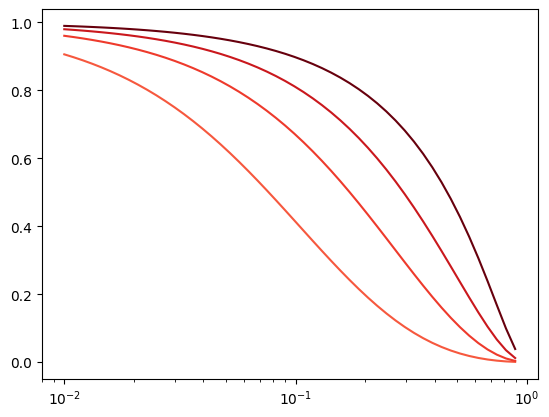

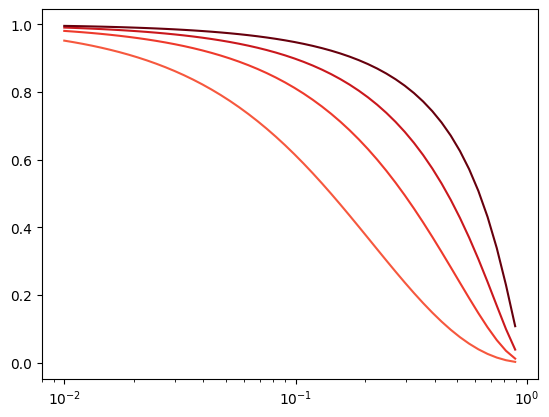

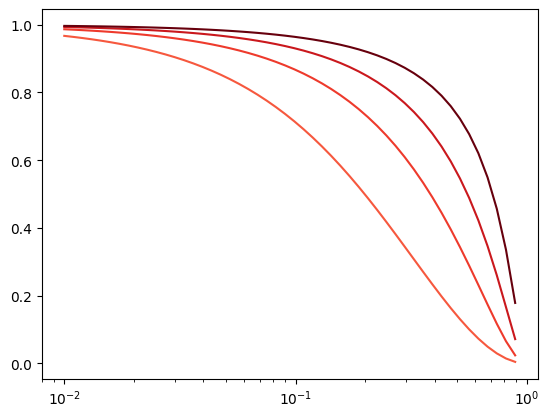

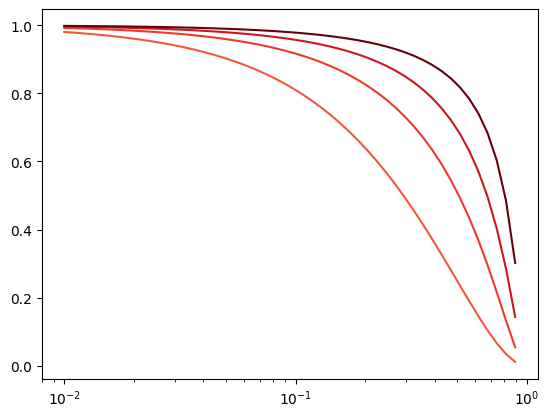

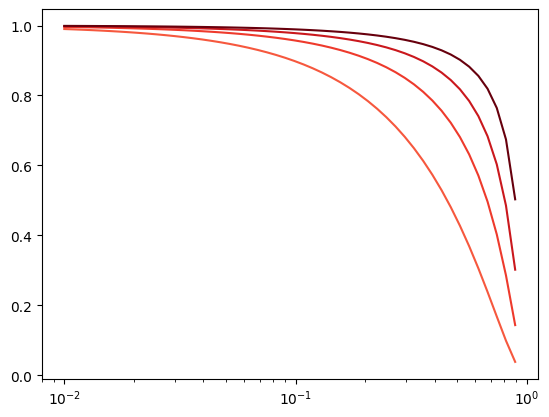

In [18]:
power_ratio = sp.lambdify(((sigma, eta_he, tbe),), power_ratio_vs_sigma_eta_he.rhs)

tbe_values = np.logspace(-2, -0.05)
sigma_values = [1, 2, 3, 5, 10]
eta_he_values = [0.2, 0.5, 1.0, 2.0]

for sigma_val in sigma_values:
    plt.figure()
    for eta_he_val in eta_he_values:
        plt.plot(
            tbe_values,
            power_ratio((sigma_val, eta_he_val, tbe_values)),
            color=cm.Reds(norm(eta_he_val)),
        )
    plt.xscale("log")


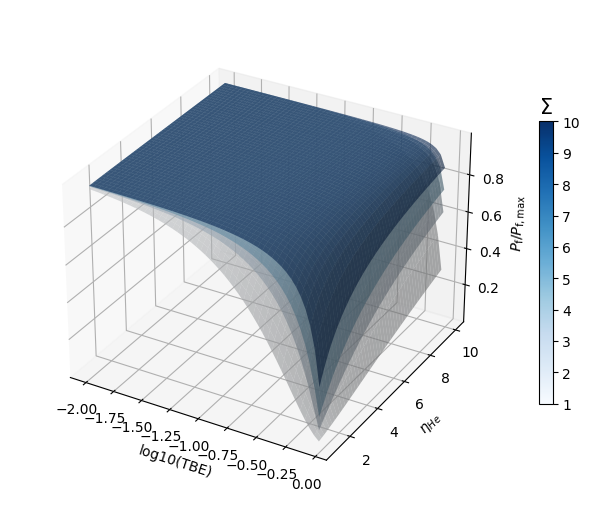

In [19]:
eta_he_values = np.linspace(1, 10)
XX, YY = np.meshgrid(tbe_values, eta_he_values)

from mpl_toolkits import mplot3d
%matplotlib inline
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')


# choose one of these norms
# norm = colors.LogNorm()
# sigma_values = [0.001, 0.01, 0.1, 1]

norm = colors.Normalize()
sigma_values = [1, 3, 5, 10]

norm(sigma_values)


for sigma_val in sigma_values:
    cf = ax.plot_surface(np.log10(XX), YY, power_ratio((sigma_val, YY, XX)), color=cm.Blues(norm(sigma_val)), alpha=0.6)
plt.xlabel("log10(TBE)")
plt.ylabel("$\eta_{He}$")
ax.set_zlabel("$P_\mathrm{f}/P_\mathrm{f, max}$")

plt.gca().set_box_aspect(aspect=(4,4,3), zoom=0.9)
cb = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.Blues), fraction=0.026, pad=0.04, ax=plt.gca())
cb.ax.set_title("$\Sigma$", fontsize=15)
plt.tight_layout()
plt.show()

Required $n_e \ \tau_E$ multiplier

In [20]:
n_e = sp.Symbol("n_e")
tau_e = sp.Symbol(r"\tau_E")
q_p = sp.Symbol("Q_p")
T = sp.Symbol("T")
e_alpha = sp.Symbol(r"E_\alpha")
R_T = sp.Symbol("R(T)_\mathrm{DT}")


eq26 = sp.Eq(n_e*tau_e*(sp.Rational(1)+sp.Rational(5)/q_p), (sp.Rational(12)*T/(e_alpha*R_T)) * ((sp.Rational(1)-sp.Rational(0.5)*f_dil)/(sp.Rational(1)-sp.Rational(2)*f_dil)**2))
eq26

Eq(\tau_E*n_e*(1 + 5/Q_p), 12*T*(1 - f_{dil}/2)/(E_\alpha*R(T)_\mathrm{DT}*(1 - 2*f_{dil})**2))

In [21]:
multiplier = (sp.Rational(1)-sp.Rational(0.5)*f_dil)/(sp.Rational(1)-sp.Rational(2)*f_dil)**2

multiplier = multiplier.subs(f_dil, sp.solve(f_alpha_core_expr, f_dil)[0]).subs(
    f_alpha_core, sp.solve(enrichment, f_alpha_core)[0]
).subs(
    f_he_div, sp.solve(eq12, f_he_div)[0]
).simplify()

multiplier

(\Sigma*\eta_{He}*(\mathrm{TBE} - 1) - \mathrm{TBE})*(4*\Sigma*\eta_{He}*(\mathrm{TBE} - 1) - 3*\mathrm{TBE})/(4*\Sigma**2*\eta_{He}**2*(\mathrm{TBE} - 1)**2)

C:\Users\remidm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\labellines\core.py:204: UserWarning: The value at position 0 in `xvals` is outside the range of its associated line (xmin=0.001, xmax=0.07241648303052405, xval=0.5314379241592807). Clipping it into the allowed range.
  warnings.warn(


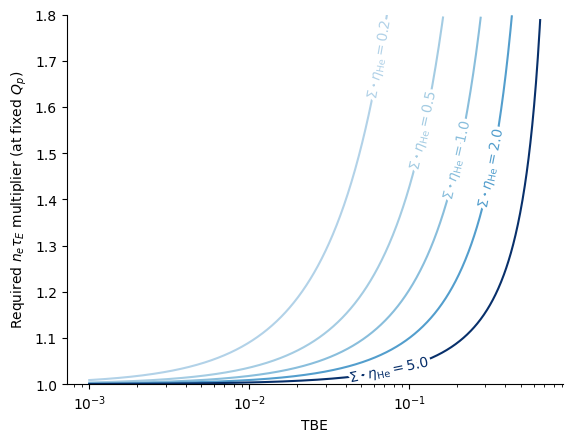

In [22]:
multiplier_f = sp.lambdify(((sigma, eta_he, tbe),), multiplier)

tbe_values = np.geomspace(1e-3, 8e-1, 1000)
product_values = [0.2, 0.5, 1.0, 2.0, 5.0]
norm = colors.Normalize(vmin=-2, vmax=5.0)
for product in product_values:
    multiplier_values = multiplier_f((1, product, tbe_values))
    multiplier_values_cut = multiplier_values[np.where(multiplier_values < 1.8)]
    tbe_values_cut = tbe_values[np.where(multiplier_values < 1.8)]
    plt.plot(tbe_values_cut, multiplier_values_cut, color=cm.Blues(norm(product)), label="$\Sigma \cdot \eta_\mathrm{He} = $" + f"{product}")
plt.xscale("log")
plt.ylim(1, 1.8)
labelLines(plt.gca().get_lines(), zorder=2.5)
plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)

plt.xlabel("TBE")
plt.ylabel(r"Required $n_e \tau_E$ multiplier (at fixed $Q_p$)")
plt.savefig("ntau_TBE.pdf")


## Derive expression of $Q_p$ at fixed $Q_{p,0}$

First replace $f_\mathrm{dil}$ by zero to obtain $Q_{p,0}$:

In [23]:
q_p_0 = sp.Symbol("Q_{p, 0}")

eq26_zero_dil = eq26.subs(f_dil, 0).subs(q_p, q_p_0)
eq26_zero_dil


Eq(\tau_E*n_e*(1 + 5/Q_{p, 0}), 12*T/(E_\alpha*R(T)_\mathrm{DT}))

Inject this equation in Eq 26

In [24]:
eq_Q_p = sp.Eq(q_p, sp.solve(eq26.subs(tau_e, sp.solve(eq26_zero_dil, tau_e)[0]).simplify(), q_p)[0].simplify())
eq_Q_p


Eq(Q_p, 10*Q_{p, 0}*(-4*f_{dil}**2 + 4*f_{dil} - 1)/(8*Q_{p, 0}*f_{dil}**2 - 7*Q_{p, 0}*f_{dil} + 5*f_{dil} - 10))

Express as a function of TBE and $\Sigma \cdot \eta_\mathrm{He}$

In [25]:
eq_Q_p = eq_Q_p.subs(f_dil, sp.solve(f_alpha_core_expr, f_dil)[0]).subs(
    f_alpha_core, sp.solve(enrichment, f_alpha_core)[0]
).subs(
    f_he_div, sp.solve(eq12, f_he_div)[0]
).simplify()
eq_Q_p

Eq(Q_p, -20*Q_{p, 0}*(\mathrm{TBE}**2 + 2*\mathrm{TBE}*(\Sigma*\eta_{He}*(\mathrm{TBE} - 1) - \mathrm{TBE}) + (\Sigma*\eta_{He}*(\mathrm{TBE} - 1) - \mathrm{TBE})**2)/(4*Q_{p, 0}*\mathrm{TBE}**2 + \mathrm{TBE}*(7*Q_{p, 0} - 5)*(\Sigma*\eta_{He}*(\mathrm{TBE} - 1) - \mathrm{TBE}) - 20*(\Sigma*\eta_{He}*(\mathrm{TBE} - 1) - \mathrm{TBE})**2))

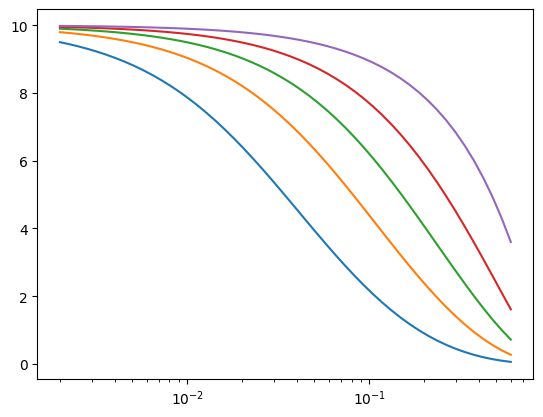

In [26]:
compute_q_p = sp.lambdify(((sigma, eta_he, tbe, q_p_0),), sp.solve(eq_Q_p, q_p)[0])

tbe_values = np.geomspace(2e-3, 6e-1)

for product in product_values:
    plt.plot(tbe_values, compute_q_p((1, product, tbe_values, 10)))

plt.xscale("log")